In [ ]:
!pip install pgeocode
!pip install geopy

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
import numpy as np
import pgeocode


## Nace

In [24]:
df_nace_mapping = pd.read_excel("raw_data/nace_mapping.xlsx")

dico_nace_mapping = {}

dico_nace_mapping["unknown"] = "unknown"

for i, rows in df_nace_mapping.iterrows():
    dico_nace_mapping[str(rows["Four"])] = rows["Letter"]
    dico_nace_mapping[str(rows["Three"])] = rows["Letter"]
    dico_nace_mapping[str(rows["Two"])] = rows["Letter"]

## Analysis of actes

In [2]:
actes = pd.read_csv("raw_data/actes.csv")

In [7]:
actes_pj = pd.read_csv("raw_data/actes_pj.csv")

In [8]:
actes_pj.head()

,siren,PJ_01,PJ_02,PJ_03,PJ_04,PJ_05,PJ_06,PJ_07,PJ_133,PJ_134,...,PJ_85,PJ_86,PJ_87,PJ_91,PJ_92,PJ_93,PJ_94,PJ_97,original électronique,orignal électronique
0,5580113,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5673348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5720313,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5720784,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5880679,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
actes_pj.corr()

: 

In [154]:
# matching_pj_libelle = pd.read_csv("données/matching_pj_libelle.csv", delimiter=",")

In [68]:
dataset = pd.read_csv("raw_data/dataset 1.00.csv")

In [ ]:
def get_binary_columns(dataset):
    """get lists of binary column names"""
    binary_columns = [column for column in categorielle if dataset[column].nunique()==2]
    return binary_columns


get_binary_columns(dataset)


NameError: name 'categorielle' is not defined

In [70]:
dataset['eirl'].unique()

array([nan, False, True], dtype=object)

In [156]:
#actes.info()

In [157]:
#actes.head(3)

# Analyse of NA

In [158]:
#actes.isna().sum()

In [159]:
# sns.barplot(x= actes.isna().sum().index, y=actes.isna().sum().values)

# plt.xticks(rotation=90)
# plt.title("NA")
# plt.show()

sur les 3millions de lignes, 835K n'ont pas de type of docs

In [160]:
#pj = actes['typedocument'].value_counts(normalize=True)

In [161]:
#pj = pj.head(10)

In [162]:
# sns.displot(data = pj, x= pj.index, y=pj)
# plt.xticks(rotation = 90)
# plt.title("Distribution of top 10 type of docs")


In [163]:
#actes['lastupdate']

## Code postal

In [51]:
dataset = dataset[:100]

In [ ]:
!pip install pgeocode
!pip install geopy
import pgeocode

from geopy.geocoders import Nominatim

# getting the lat and lon for row if there is a code postal or not
nomi = pgeocode.Nominatim('fr')
geolocator = Nominatim(user_agent="geoapi", timeout=10)
def get_coordonnees_par_code(row):
    lat, lon =  nomi.query_postal_code(str(row['code_postal']))['latitude'], nomi.query_postal_code(str(row['code_postal']))['longitude']

    return  lat, lon


def get_coordonnees_par_region(row):
    lat, lon =  geolocator.geocode(str(row['region'])).latitude, geolocator.geocode(str(row['region'])).longitude

    return  lat, lon



# take unique code postal
villes = pd.DataFrame(dataset.drop_duplicates(subset=['code_postal'])['code_postal'])

villes['latitude'] = villes.apply(lambda row: get_coordonnees_par_code(row)[0], axis=1)
villes['longitude'] = villes.apply(lambda row: get_coordonnees_par_code(row)[1], axis=1)

region = pd.DataFrame(dataset.drop_duplicates(subset=['region'])['region'])

region['latitude'] = region.apply(lambda row: get_coordonnees_par_region(row)[0], axis=1)
region['longitude'] = region.apply(lambda row: get_coordonnees_par_region(row)[1], axis=1)
# complete the dataset with the smaller coordonnes df

dataset['latitude'] = dataset.apply(lambda row: region[region['region'] == row['region']]["latitude"].iloc[0] if (pd.isna(row['code_postal']) or pd.isna(villes[villes['code_postal'] == row['code_postal']]["latitude"].iloc[0])) else villes[villes['code_postal'] == row['code_postal']]["latitude"].iloc[0], axis=1)
dataset['longitude'] = dataset.apply(lambda row: region[region['region'] == row['region']]["longitude"].iloc[0] if (pd.isna(row['code_postal']) or pd.isna(villes[villes['code_postal'] == row['code_postal']]["longitude"].iloc[0])) else villes[villes['code_postal'] == row['code_postal']]["longitude"].iloc[0], axis=1)

Pays de la Loire 47.6594864 -0.8186143
Occitanie 43.6487851 2.3435684
Corse 42.188089649999995 9.068413771427695
Île-de-France 48.6443057 2.7537863
Provence-Alpes-Côte d'Azur 44.0580563 6.0638506
Bretagne 48.2640845 -2.9202408
Nouvelle-Aquitaine 45.4039367 0.3756199
Auvergne-Rhône-Alpes 45.2968119 4.6604809
Guadeloupe 16.2528827 -61.5686855
Centre-Val de Loire 47.5490251 1.7324062
Mayotte -12.825543 45.148490830203045
Bourgogne-Franche-Comté 47.0510946 5.0740568
Grand Est 48.4845157 6.113035
Hauts-de-France 50.1024606 2.7247515
Normandie 49.0677708 0.3138532
La Réunion -21.130737949999997 55.536480112992315
Pays de la Loire 47.6594864 -0.8186143
Occitanie 43.6487851 2.3435684
Corse 42.188089649999995 9.068413771427695
Île-de-France 48.6443057 2.7537863
Provence-Alpes-Côte d'Azur 44.0580563 6.0638506
Bretagne 48.2640845 -2.9202408
Nouvelle-Aquitaine 45.4039367 0.3756199
Auvergne-Rhône-Alpes 45.2968119 4.6604809
Guadeloupe 16.2528827 -61.5686855
Centre-Val de Loire 47.5490251 1.7324062
M

# Analyse du dataset

In [ ]:
dataset.describe()

,siren,formeJuridique,formeJuridique_1,is_defaulted
count,1.247111e+06,1.239215e+06,1.247073e+06,1.247111e+06
mean,7.946655e+08,4.711044e+03,4.713561e+03,2.935344e-02
std,1.939967e+08,1.990348e+03,1.988291e+03,1.687953e-01
min,5.620174e+06,1.000000e+03,1.000000e+03,0.000000e+00
25%,7.923731e+08,5.499000e+03,5.499000e+03,0.000000e+00
50%,8.846298e+08,5.710000e+03,5.710000e+03,0.000000e+00
75%,9.291622e+08,5.710000e+03,5.710000e+03,0.000000e+00
max,9.999907e+08,9.970000e+03,9.970000e+03,1.000000e+00


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247111 entries, 0 to 1247110
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1247111 non-null  object 
 1   siren                            1247111 non-null  int64  
 2   lastUpdate                       1247111 non-null  object 
 3   diffusionInsee                   1161335 non-null  object 
 4   typePersonne                     1247078 non-null  object 
 5   diffusionCommerciale             1247111 non-null  bool   
 6   formeJuridique                   1239215 non-null  float64
 7   succursaleOuFiliale              1126749 non-null  object 
 8   formeExerciceActivitePrincipale  1196833 non-null  object 
 9   dateCreation                     1224851 non-null  object 
 10  societeEtrangere                 1240684 non-null  object 
 11  formeJuridique_1                 1247073 non-null 

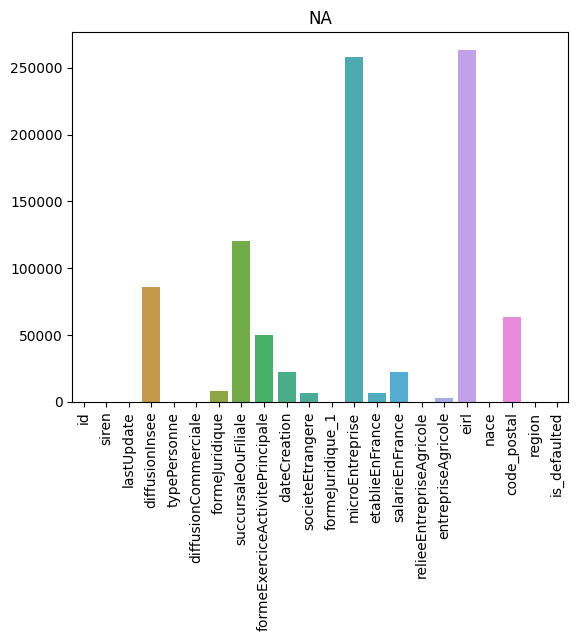

In [ ]:
sns.barplot(x= dataset.isna().sum().index, y=dataset.isna().sum().values)

plt.xticks(rotation=90)
plt.title("NA")
plt.show()

## Localisation des entreprises

In [ ]:
dataset["etablieEnFrance"].value_counts(normalize=True)

True     0.998428
False    0.001572
Name: etablieEnFrance, dtype: float64

<AxesSubplot:ylabel='etablieEnFrance'>

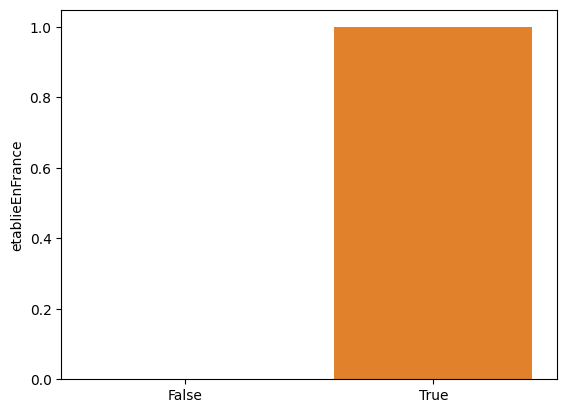

In [ ]:
sns.barplot(x= dataset["etablieEnFrance"].value_counts(normalize=True).index, y=dataset["etablieEnFrance"].value_counts(normalize=True))

In [ ]:
region = dataset["region"].value_counts(normalize=True)

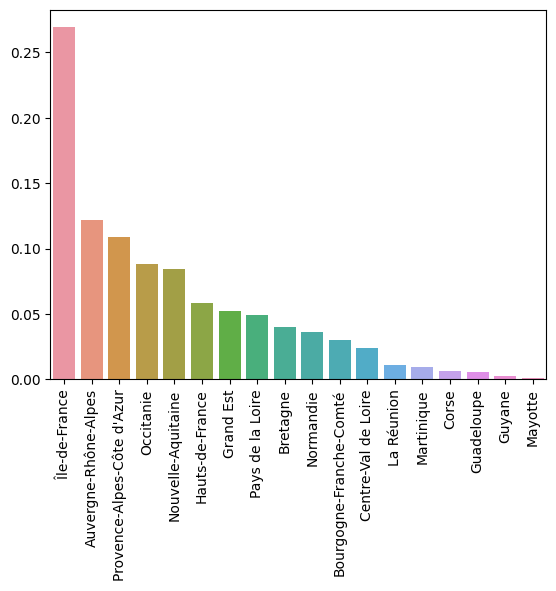

In [ ]:
sns.barplot(x=region.index, y=region.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
dataset.head()

,id,siren,lastUpdate,diffusionInsee,typePersonne,diffusionCommerciale,formeJuridique,succursaleOuFiliale,formeExerciceActivitePrincipale,dateCreation,...,microEntreprise,etablieEnFrance,salarieEnFrance,relieeEntrepriseAgricole,entrepriseAgricole,eirl,nace,code_postal,region,is_defaulted
0,6690e252df977c0f7f0a703e,930911136,2025-02-01,O,M,False,5499.0,AVEC_ETABLISSEMENT,COMMERCIALE,2024-07-12,...,NaN,True,False,False,False,NaN,46.23Z,49520,Pays de la Loire,0
1,669a551a1a4b9b4e0b01e721,930736194,2025-02-01,O,M,False,6540.0,AVEC_ETABLISSEMENT,GESTION_DE_BIENS,2024-07-19,...,NaN,True,False,False,False,NaN,68.20B,12300,Occitanie,0
2,669a79d466f92edbcc03ac69,931237135,2025-02-01,O,M,False,6594.0,AVEC_ETABLISSEMENT,COMMERCIALE,2024-07-19,...,NaN,True,False,False,False,NaN,82.11Z,20213,Corse,0
3,66e02e8f23eb8b6cfd0acc0e,932814932,2025-02-01,NaN,M,False,5499.0,AVEC_ETABLISSEMENT,GESTION_DE_BIENS,2024-09-10,...,NaN,True,False,False,False,NaN,68.20A,44500,Pays de la Loire,0
4,66ffa205d3cf4709450aafbf,933547861,2025-02-01,N,P,False,1000.0,AVEC_ETABLISSEMENT,ARTISANALE,2024-10-04,...,True,True,False,False,False,False,32.13Z,77000,Île-de-France,0


## Type de Structure

In [ ]:
dataset["formeJuridique"].value_counts(normalize=True)

5710.0    3.990631e-01
1000.0    2.187877e-01
5499.0    2.161933e-01
6540.0    7.800341e-02
5202.0    1.853835e-02
              ...     
6587.0    8.069625e-07
6567.0    8.069625e-07
2110.0    8.069625e-07
5561.0    8.069625e-07
8490.0    8.069625e-07
Name: formeJuridique, Length: 203, dtype: float64

# conversion des dates et analyse des Dates

In [ ]:
dataset["dateCreation"]

0          2024-07-12
1          2024-07-19
2          2024-07-19
3          2024-09-10
4          2024-10-04
              ...    
1247106    2000-04-11
1247107    1995-01-30
1247108    2024-07-15
1247109    2024-07-15
1247110    2024-07-15
Name: dateCreation, Length: 1247111, dtype: object

In [ ]:
dataset["dateCreation"] = dataset["dateCreation"].apply(lambda x: str(x)[:4])

In [ ]:

dataset["dateCreation"].value_counts(normalize=True)

2024    3.114045e-01
2021    7.142107e-02
2022    6.362786e-02
2020    5.027941e-02
2019    4.415886e-02
            ...     
1918    2.405560e-06
1909    1.603706e-06
1919    1.603706e-06
0021    8.018532e-07
1896    8.018532e-07
Name: dateCreation, Length: 114, dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247111 entries, 0 to 1247110
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1247111 non-null  object 
 1   siren                            1247111 non-null  int64  
 2   lastUpdate                       1247111 non-null  object 
 3   diffusionInsee                   1161335 non-null  object 
 4   typePersonne                     1247078 non-null  object 
 5   diffusionCommerciale             1247111 non-null  bool   
 6   formeJuridique                   1239215 non-null  float64
 7   succursaleOuFiliale              1126749 non-null  object 
 8   formeExerciceActivitePrincipale  1196833 non-null  object 
 9   dateCreation                     1247111 non-null  object 
 10  societeEtrangere                 1240684 non-null  object 
 11  formeJuridique_1                 1247073 non-null 

In [ ]:
dataset["Anne_creation_fourchette"] = dataset['dateCreation'].apply(lambda x: 5*round(float(x)/5,0))

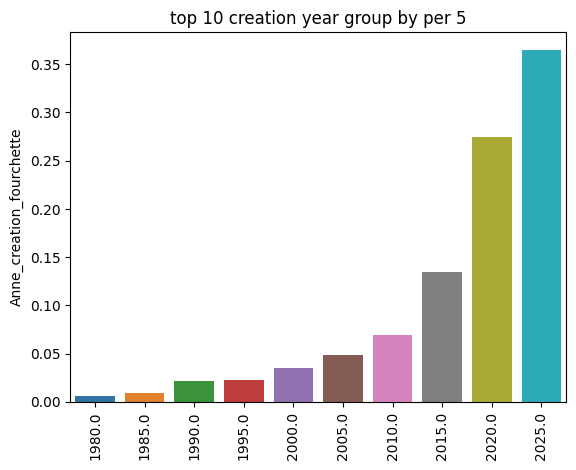

In [ ]:
sns.barplot(x= dataset["Anne_creation_fourchette"].value_counts(normalize=True).head(10).index, y=dataset["Anne_creation_fourchette"].value_counts(normalize=True).head(10))
plt.title("top 10 creation year group by per 5")
plt.xticks(rotation=90)
plt.show()

# Balance of Classes

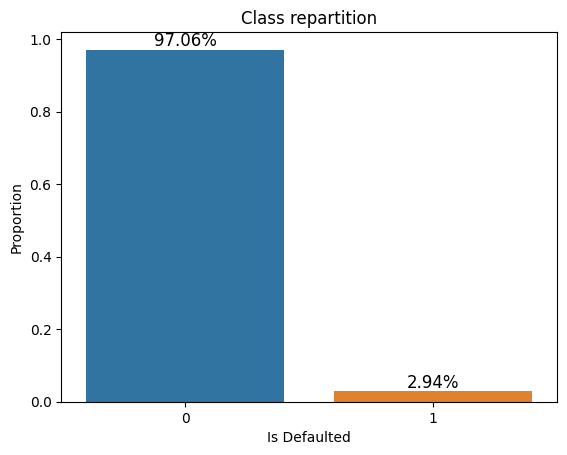

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

value_counts = dataset['is_defaulted'].value_counts(normalize=True)

x = value_counts.index
y = value_counts.values
ax = sns.barplot(x=x, y=y)

for i, v in enumerate(y):
    ax.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=12)  # Display as percentage

plt.xlabel("Is Defaulted")
plt.ylabel("Proportion")
plt.title("Class repartition")

plt.show()


In [ ]:
dataset["eirl"]

0            NaN
1            NaN
2            NaN
3            NaN
4          False
           ...  
1247106    False
1247107    False
1247108    False
1247109    False
1247110    False
Name: eirl, Length: 1247111, dtype: object

# Secteur d'activité

In [ ]:
nace_industry = pd.read_csv('raw_data/nace_industry.csv', delimiter=';')

In [ ]:
nace_industry

,Letter,Section Name
0,A,Agriculture Forestry Fishing
1,B,Mining and Quarrying
2,C,Manufacturing
3,D,Electricity Gas Steam and Air Conditioning ...
4,E,Water Supply; Sewerage Waste Management and ...
5,F,Construction
6,G,Wholesale and Retail Trade; Repair of Motor Ve...
7,H,Transportation and Storage
8,I,Accommodation and Food Service Activities
9,J,Information and Communication


code, lettre, age

table nace industry problem

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247111 entries, 0 to 1247110
Data columns (total 23 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1247111 non-null  object 
 1   siren                            1247111 non-null  int64  
 2   lastUpdate                       1247111 non-null  object 
 3   diffusionInsee                   1161335 non-null  object 
 4   typePersonne                     1247078 non-null  object 
 5   diffusionCommerciale             1247111 non-null  bool   
 6   formeJuridique                   1239215 non-null  float64
 7   succursaleOuFiliale              1126749 non-null  object 
 8   formeExerciceActivitePrincipale  1196833 non-null  object 
 9   dateCreation                     1247111 non-null  object 
 10  societeEtrangere                 1240684 non-null  object 
 11  formeJuridique_1                 1247073 non-null 

## Dataset Cleaning

In [ ]:
dataset.drop(["lastUpdate", "siren", "id", "formeJuridique"], axis=1, inplace=True) #formetJuridique1 est légèrement + complet

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247111 entries, 0 to 1247110
Data columns (total 19 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   diffusionInsee                   1161335 non-null  object 
 1   typePersonne                     1247078 non-null  object 
 2   diffusionCommerciale             1247111 non-null  bool   
 3   succursaleOuFiliale              1126749 non-null  object 
 4   formeExerciceActivitePrincipale  1196833 non-null  object 
 5   dateCreation                     1247111 non-null  object 
 6   societeEtrangere                 1240684 non-null  object 
 7   formeJuridique_1                 1247073 non-null  float64
 8   microEntreprise                  988943 non-null   object 
 9   etablieEnFrance                  1240658 non-null  object 
 10  salarieEnFrance                  1224660 non-null  object 
 11  relieeEntrepriseAgricole         1247111 non-null 

In [ ]:
dataset.columns

Index(['diffusionInsee', 'typePersonne', 'diffusionCommerciale',
       'succursaleOuFiliale', 'formeExerciceActivitePrincipale',
       'dateCreation', 'societeEtrangere', 'formeJuridique_1',
       'microEntreprise', 'etablieEnFrance', 'salarieEnFrance',
       'relieeEntrepriseAgricole', 'entrepriseAgricole', 'eirl', 'nace',
       'code_postal', 'region', 'is_defaulted', 'Anne_creation_fourchette'],
      dtype='object')

In [ ]:
#Splitting of data between numerical and categorial
categorielle = ['diffusionInsee', 'typePersonne','diffusionCommerciale', 'succursaleOuFiliale',
       'formeExerciceActivitePrincipale', 'societeEtrangere',
       'formeJuridique_1', 'microEntreprise', 'etablieEnFrance',
       'salarieEnFrance', 'relieeEntrepriseAgricole', 'entrepriseAgricole',"Anne_creation_fourchette",
       'eirl', 'region', "sectionName"]
other = ['dateCreation', 'nace', 'code_postal']
X = dataset.drop(['is_defaulted'], axis=1)
y = dataset['is_defaulted']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
from sklearn.utils import resample
train_data = pd.concat([X_train, y_train], axis=1)

class_0 = train_data[train_data['is_defaulted'] == 0]
class_1 = train_data[train_data['is_defaulted'] == 1]

class_0_undersampled = resample(class_0,
                                replace=False,    # Ne pas remplacer les échantillons
                                n_samples=3*len(class_1), # Réduire la classe majoritaire à la taille de la classe minoritaire
                                random_state=42)

train_undersampled = pd.concat([class_0_undersampled, class_1])
train_undersampled = train_undersampled.sample(frac=1, random_state=42)

# Séparer les caractéristiques (X) et la cible (y)
X_train = train_undersampled.drop('is_defaulted', axis=1)
y_train = train_undersampled['is_defaulted']


In [ ]:
y_train.value_counts()

0    76875
1    25625
Name: is_defaulted, dtype: int64

In [ ]:
# Apply the transformation with mean replacement for NaN values
X_train["dateCreation"] = X_train["dateCreation"].apply(
    lambda x: str(x)[:4])


## Nace


In [ ]:
df_nace_mapping = pd.read_excel("raw_data/nace_mapping.xlsx")

dico_nace_mapping = {}

dico_nace_mapping["unknown"] = "unknown"

for i, rows in df_nace_mapping.iterrows():
    dico_nace_mapping[str(rows["Four"])] = rows["Letter"]
    dico_nace_mapping[str(rows["Three"])] = rows["Letter"]
    dico_nace_mapping[str(rows["Two"])] = rows["Letter"]

In [ ]:
def transform_nace(df):
    # Create a copy to avoid modifying the original dataframe
    result_df = df.copy()

    # Extract the letter part
    result_df['nace_letter'] = result_df['nace'].str.extract(r'([A-Za-z]+)')[0]

    # Extract all digits and remove dots
    result_df['nace_four'] = result_df['nace'].str.replace(r'[^0-9]', '', regex=True)

    # Pad with trailing zeros if needed to ensure 4 digits
    result_df['nace_four'] = result_df['nace_four'].apply(lambda x: "#" + str(x).ljust(4, '0') if len(str(x)) < 4 else "#" + x)
    result_df['nace_three'] = result_df['nace_four'].str[:4]
    result_df['nace_two'] = result_df['nace_four'].str[:3]

    return result_df

In [ ]:
X_train = transform_nace(X_train)

X_train["nace_four"] = np.where(X_train["nace_four"].isin(list(dico_nace_mapping.keys())), X_train["nace_four"], "unknown")
X_train["nace_three"] = np.where(X_train["nace_three"].isin(dico_nace_mapping), X_train["nace_three"], "unknown")
X_train["nace_two"] = np.where(X_train["nace_two"].isin(dico_nace_mapping), X_train["nace_two"], "unknown")

X_train.loc[:, "nace_letter"] = X_train.apply(lambda x: dico_nace_mapping.get(x["nace_two"], x["nace_letter"]), axis=1)

X_train

,diffusionInsee,typePersonne,diffusionCommerciale,succursaleOuFiliale,formeExerciceActivitePrincipale,dateCreation,societeEtrangere,formeJuridique_1,microEntreprise,etablieEnFrance,...,entrepriseAgricole,eirl,nace,code_postal,region,Anne_creation_fourchette,nace_letter,nace_four,nace_three,nace_two
215100,N,P,False,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,1000.0,True,True,...,False,False,47.91B,66200,Occitanie,2025.0,G,#4791,#479,#47
431718,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2022,False,5499.0,False,True,...,False,False,56.10A,06260,Provence-Alpes-Côte d'Azur,2020.0,I,#5610,#561,#56
881453,O,M,False,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,5499.0,NaN,True,...,False,NaN,46.13Z,60000,Hauts-de-France,2025.0,G,#4613,#461,#46
1147019,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2017,False,5499.0,False,True,...,False,False,56.21Z,94470,Île-de-France,2015.0,I,#5621,#562,#56
118318,O,P,True,AVEC_ETABLISSEMENT,COMMERCIALE,2021,False,1000.0,False,True,...,False,False,68.31Z,94150,Île-de-France,2020.0,L,#6831,#683,#68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021964,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,5499.0,False,True,...,False,False,68.31Z,91100,Île-de-France,2025.0,L,#6831,#683,#68
275923,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2018,False,5710.0,False,True,...,False,False,68.31Z,29140,Bretagne,2020.0,L,#6831,#683,#68
985407,O,P,True,NaN,COMMERCIALE,2024,False,1000.0,True,False,...,False,False,53.20Z,66000,Occitanie,2025.0,H,#5320,#532,#53
552477,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2020,False,5710.0,False,True,...,False,False,56.10A,24200,Nouvelle-Aquitaine,2020.0,I,#5610,#561,#56


In [ ]:
X_train = X_train.merge(right=nace_industry, how="left", left_on='nace_letter', right_on='Letter')
X_train.drop(columns=["Letter"], axis=1, inplace=True)
X_train.rename(columns={"Section Name": "sectionName"}, inplace=True)
X_train

,diffusionInsee,typePersonne,diffusionCommerciale,succursaleOuFiliale,formeExerciceActivitePrincipale,dateCreation,societeEtrangere,formeJuridique_1,microEntreprise,etablieEnFrance,...,eirl,nace,code_postal,region,Anne_creation_fourchette,nace_letter,nace_four,nace_three,nace_two,sectionName
0,N,P,False,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,1000.0,True,True,...,False,47.91B,66200,Occitanie,2025.0,G,#4791,#479,#47,Wholesale and Retail Trade; Repair of Motor Ve...
1,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2022,False,5499.0,False,True,...,False,56.10A,06260,Provence-Alpes-Côte d'Azur,2020.0,I,#5610,#561,#56,Accommodation and Food Service Activities
2,O,M,False,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,5499.0,NaN,True,...,NaN,46.13Z,60000,Hauts-de-France,2025.0,G,#4613,#461,#46,Wholesale and Retail Trade; Repair of Motor Ve...
3,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2017,False,5499.0,False,True,...,False,56.21Z,94470,Île-de-France,2015.0,I,#5621,#562,#56,Accommodation and Food Service Activities
4,O,P,True,AVEC_ETABLISSEMENT,COMMERCIALE,2021,False,1000.0,False,True,...,False,68.31Z,94150,Île-de-France,2020.0,L,#6831,#683,#68,Real Estate Activities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102495,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,5499.0,False,True,...,False,68.31Z,91100,Île-de-France,2025.0,L,#6831,#683,#68,Real Estate Activities
102496,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2018,False,5710.0,False,True,...,False,68.31Z,29140,Bretagne,2020.0,L,#6831,#683,#68,Real Estate Activities
102497,O,P,True,NaN,COMMERCIALE,2024,False,1000.0,True,False,...,False,53.20Z,66000,Occitanie,2025.0,H,#5320,#532,#53,Transportation and Storage
102498,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2020,False,5710.0,False,True,...,False,56.10A,24200,Nouvelle-Aquitaine,2020.0,I,#5610,#561,#56,Accommodation and Food Service Activities


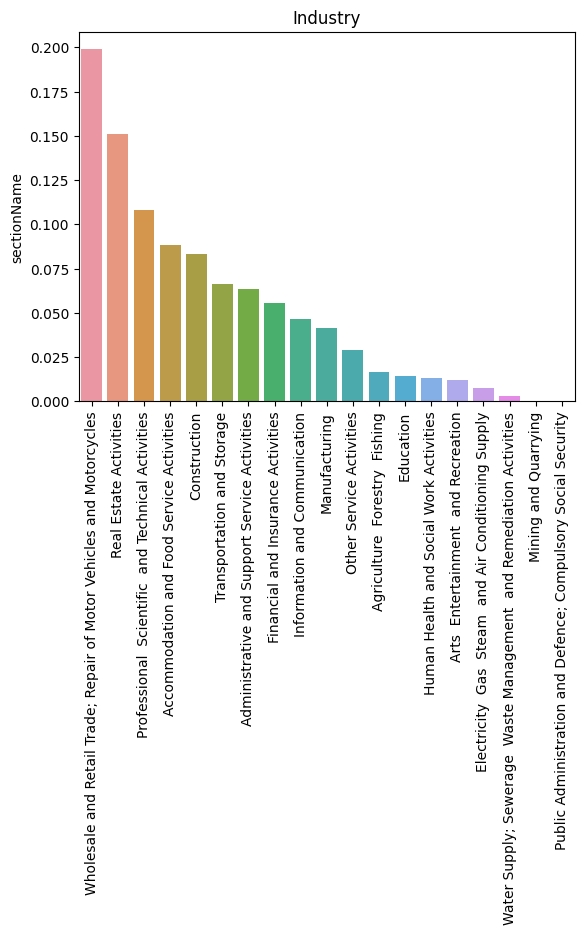

In [ ]:
sns.barplot(x=X_train['sectionName'].value_counts(normalize=True).head(20).index, y= X_train['sectionName'].value_counts(normalize=True).head(20))
plt.title("Industry")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#df_default =  X_train.loc[X_train['is_defaulted'] == 1]

#sns.barplot(x=df_default['code_postal'].value_counts(normalize=True).head(20).index, y= df_default['code_postal'].value_counts(normalize=True).head(20))
#plt.title("Industry")
#plt.xticks(rotation=90)
#plt.show()

In [ ]:
#number of different values per column
for column in categorielle:
    print(f"nom de la colonne : {column} : {X_train[column].nunique()} ")
    if X_train[column].nunique() <=5:
        print(f"nom de la colonne : {column} : {X_train[column].unique()} ")


nom de la colonne : diffusionInsee : 3 
nom de la colonne : diffusionInsee : ['N' 'O' nan 'P'] 
nom de la colonne : typePersonne : 3 
nom de la colonne : typePersonne : ['P' 'M' 'E' nan] 
nom de la colonne : diffusionCommerciale : 2 
nom de la colonne : diffusionCommerciale : [False  True] 
nom de la colonne : succursaleOuFiliale : 3 
nom de la colonne : succursaleOuFiliale : ['AVEC_ETABLISSEMENT' nan 'ETABLISSEMENT_OU_SUCCURSALE'
 'AUCUN_ETABLISSEMENT'] 
nom de la colonne : formeExerciceActivitePrincipale : 10 
nom de la colonne : societeEtrangere : 2 
nom de la colonne : societeEtrangere : [False nan True] 
nom de la colonne : formeJuridique_1 : 137 
nom de la colonne : microEntreprise : 2 
nom de la colonne : microEntreprise : [True False nan] 
nom de la colonne : etablieEnFrance : 2 
nom de la colonne : etablieEnFrance : [True nan False] 
nom de la colonne : salarieEnFrance : 2 
nom de la colonne : salarieEnFrance : [False True nan] 
nom de la colonne : relieeEntrepriseAgricole : 2

In [ ]:
# binary encoding
binary_columns = [column for column in categorielle if X_train[column].nunique()==2]

In [ ]:
binary_columns

['diffusionCommerciale',
 'societeEtrangere',
 'microEntreprise',
 'etablieEnFrance',
 'salarieEnFrance',
 'relieeEntrepriseAgricole',
 'entrepriseAgricole',
 'eirl']

In [ ]:
#one_hot
one_hot_columns = [column for column in categorielle if column not in binary_columns]

In [ ]:
one_hot_columns

['diffusionInsee',
 'typePersonne',
 'succursaleOuFiliale',
 'formeExerciceActivitePrincipale',
 'formeJuridique_1',
 'Anne_creation_fourchette',
 'region',
 'sectionName']

# Managing N/A

In [ ]:
from sklearn import impute

In [ ]:
imputer = impute.SimpleImputer(strategy="most_frequent")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns= imputer.get_feature_names_out())


In [ ]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102500 entries, 0 to 102499
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   diffusionInsee                   102500 non-null  object
 1   typePersonne                     102500 non-null  object
 2   diffusionCommerciale             102500 non-null  object
 3   succursaleOuFiliale              102500 non-null  object
 4   formeExerciceActivitePrincipale  102500 non-null  object
 5   dateCreation                     102500 non-null  object
 6   societeEtrangere                 102500 non-null  object
 7   formeJuridique_1                 102500 non-null  object
 8   microEntreprise                  102500 non-null  object
 9   etablieEnFrance                  102500 non-null  object
 10  salarieEnFrance                  102500 non-null  object
 11  relieeEntrepriseAgricole         102500 non-null  object
 12  entrepriseAgrico

In [ ]:
X_train["dateCreation"] = X_train["dateCreation"].apply(lambda x: 2024 if pd.isna(x) else x)
X_train["dateCreation"] = X_train["dateCreation"].apply(lambda x: 2024 if x == "nan" else x)

In [ ]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102500 entries, 0 to 102499
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   diffusionInsee                   102500 non-null  object
 1   typePersonne                     102500 non-null  object
 2   diffusionCommerciale             102500 non-null  object
 3   succursaleOuFiliale              102500 non-null  object
 4   formeExerciceActivitePrincipale  102500 non-null  object
 5   dateCreation                     102500 non-null  object
 6   societeEtrangere                 102500 non-null  object
 7   formeJuridique_1                 102500 non-null  object
 8   microEntreprise                  102500 non-null  object
 9   etablieEnFrance                  102500 non-null  object
 10  salarieEnFrance                  102500 non-null  object
 11  relieeEntrepriseAgricole         102500 non-null  object
 12  entrepriseAgrico

In [ ]:
# # on prend les formes juridiques si + de 100 valeurs dans la caté
values = X_train['formeJuridique_1'].value_counts()
X_train['formeJuridique_1'] = X_train['formeJuridique_1'].apply(lambda x: "other" if values[x]<=100 else str(x))

In [ ]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102500 entries, 0 to 102499
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   diffusionInsee                   102500 non-null  object
 1   typePersonne                     102500 non-null  object
 2   diffusionCommerciale             102500 non-null  object
 3   succursaleOuFiliale              102500 non-null  object
 4   formeExerciceActivitePrincipale  102500 non-null  object
 5   dateCreation                     102500 non-null  object
 6   societeEtrangere                 102500 non-null  object
 7   formeJuridique_1                 102500 non-null  object
 8   microEntreprise                  102500 non-null  object
 9   etablieEnFrance                  102500 non-null  object
 10  salarieEnFrance                  102500 non-null  object
 11  relieeEntrepriseAgricole         102500 non-null  object
 12  entrepriseAgrico

In [ ]:
X_train

,diffusionInsee,typePersonne,diffusionCommerciale,succursaleOuFiliale,formeExerciceActivitePrincipale,dateCreation,societeEtrangere,formeJuridique_1,microEntreprise,etablieEnFrance,...,eirl,nace,code_postal,region,Anne_creation_fourchette,nace_letter,nace_four,nace_three,nace_two,sectionName
0,N,P,False,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,1000.0,True,True,...,False,47.91B,66200,Occitanie,2025.0,G,#4791,#479,#47,Wholesale and Retail Trade; Repair of Motor Ve...
1,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2022,False,5499.0,False,True,...,False,56.10A,06260,Provence-Alpes-Côte d'Azur,2020.0,I,#5610,#561,#56,Accommodation and Food Service Activities
2,O,M,False,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,5499.0,False,True,...,False,46.13Z,60000,Hauts-de-France,2025.0,G,#4613,#461,#46,Wholesale and Retail Trade; Repair of Motor Ve...
3,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2017,False,5499.0,False,True,...,False,56.21Z,94470,Île-de-France,2015.0,I,#5621,#562,#56,Accommodation and Food Service Activities
4,O,P,True,AVEC_ETABLISSEMENT,COMMERCIALE,2021,False,1000.0,False,True,...,False,68.31Z,94150,Île-de-France,2020.0,L,#6831,#683,#68,Real Estate Activities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102495,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,5499.0,False,True,...,False,68.31Z,91100,Île-de-France,2025.0,L,#6831,#683,#68,Real Estate Activities
102496,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2018,False,5710.0,False,True,...,False,68.31Z,29140,Bretagne,2020.0,L,#6831,#683,#68,Real Estate Activities
102497,O,P,True,AVEC_ETABLISSEMENT,COMMERCIALE,2024,False,1000.0,True,False,...,False,53.20Z,66000,Occitanie,2025.0,H,#5320,#532,#53,Transportation and Storage
102498,O,M,True,AVEC_ETABLISSEMENT,COMMERCIALE,2020,False,5710.0,False,True,...,False,56.10A,24200,Nouvelle-Aquitaine,2020.0,I,#5610,#561,#56,Accommodation and Food Service Activities


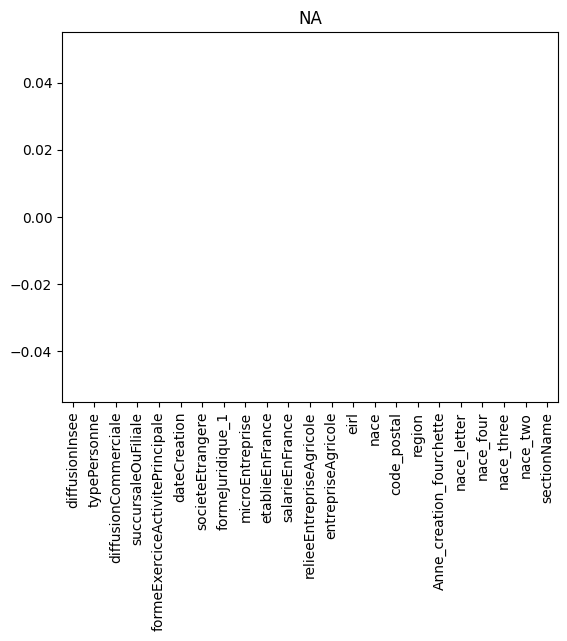

In [ ]:
sns.barplot(x= X_train.isna().sum().index, y=X_train.isna().sum().values)

plt.xticks(rotation=90)
plt.title("NA")
plt.show()

In [ ]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102500 entries, 0 to 102499
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   diffusionInsee                   102500 non-null  object
 1   typePersonne                     102500 non-null  object
 2   diffusionCommerciale             102500 non-null  object
 3   succursaleOuFiliale              102500 non-null  object
 4   formeExerciceActivitePrincipale  102500 non-null  object
 5   dateCreation                     102500 non-null  object
 6   societeEtrangere                 102500 non-null  object
 7   formeJuridique_1                 102500 non-null  object
 8   microEntreprise                  102500 non-null  object
 9   etablieEnFrance                  102500 non-null  object
 10  salarieEnFrance                  102500 non-null  object
 11  relieeEntrepriseAgricole         102500 non-null  object
 12  entrepriseAgrico

In [ ]:
from sklearn import preprocessing

In [ ]:
#binary encoding
encoder = preprocessing.LabelEncoder()
for column in binary_columns:
    X_train[column] = encoder.fit_transform(X_train[column])

In [ ]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102500 entries, 0 to 102499
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   diffusionInsee                   102500 non-null  object
 1   typePersonne                     102500 non-null  object
 2   diffusionCommerciale             102500 non-null  int64 
 3   succursaleOuFiliale              102500 non-null  object
 4   formeExerciceActivitePrincipale  102500 non-null  object
 5   dateCreation                     102500 non-null  object
 6   societeEtrangere                 102500 non-null  int64 
 7   formeJuridique_1                 102500 non-null  object
 8   microEntreprise                  102500 non-null  int64 
 9   etablieEnFrance                  102500 non-null  int64 
 10  salarieEnFrance                  102500 non-null  int64 
 11  relieeEntrepriseAgricole         102500 non-null  int64 
 12  entrepriseAgrico

In [ ]:
X_train.head()

,diffusionInsee,typePersonne,diffusionCommerciale,succursaleOuFiliale,formeExerciceActivitePrincipale,dateCreation,societeEtrangere,formeJuridique_1,microEntreprise,etablieEnFrance,...,eirl,nace,code_postal,region,Anne_creation_fourchette,nace_letter,nace_four,nace_three,nace_two,sectionName
0,N,P,0,AVEC_ETABLISSEMENT,COMMERCIALE,2024,0,1000.0,1,1,...,0,47.91B,66200,Occitanie,2025.0,G,#4791,#479,#47,Wholesale and Retail Trade; Repair of Motor Ve...
1,O,M,1,AVEC_ETABLISSEMENT,COMMERCIALE,2022,0,5499.0,0,1,...,0,56.10A,06260,Provence-Alpes-Côte d'Azur,2020.0,I,#5610,#561,#56,Accommodation and Food Service Activities
2,O,M,0,AVEC_ETABLISSEMENT,COMMERCIALE,2024,0,5499.0,0,1,...,0,46.13Z,60000,Hauts-de-France,2025.0,G,#4613,#461,#46,Wholesale and Retail Trade; Repair of Motor Ve...
3,O,M,1,AVEC_ETABLISSEMENT,COMMERCIALE,2017,0,5499.0,0,1,...,0,56.21Z,94470,Île-de-France,2015.0,I,#5621,#562,#56,Accommodation and Food Service Activities
4,O,P,1,AVEC_ETABLISSEMENT,COMMERCIALE,2021,0,1000.0,0,1,...,0,68.31Z,94150,Île-de-France,2020.0,L,#6831,#683,#68,Real Estate Activities


In [ ]:
#binary encoding
encoder = preprocessing.OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(X_train[one_hot_columns])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(one_hot_columns), index=X_train.index)
X_train = X_train.drop(columns=one_hot_columns).join(encoded_df)

print(X_train.head())

   diffusionCommerciale dateCreation  societeEtrangere  microEntreprise  \
0                     0         2024                 0                1   
1                     1         2022                 0                0   
2                     0         2024                 0                0   
3                     1         2017                 0                0   
4                     1         2021                 0                0   

   etablieEnFrance  salarieEnFrance  relieeEntrepriseAgricole  \
0                1                0                         0   
1                1                1                         0   
2                1                1                         0   
3                1                1                         0   
4                1                1                         0   

   entrepriseAgricole  eirl    nace  ...  \
0                   0     0  47.91B  ...   
1                   0     0  56.10A  ...   
2                   0     

In [ ]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102500 entries, 0 to 102499
Data columns (total 112 columns):
 #    Column                                                                            Non-Null Count   Dtype  
---   ------                                                                            --------------   -----  
 0    diffusionCommerciale                                                              102500 non-null  int64  
 1    dateCreation                                                                      102500 non-null  object 
 2    societeEtrangere                                                                  102500 non-null  int64  
 3    microEntreprise                                                                   102500 non-null  int64  
 4    etablieEnFrance                                                                   102500 non-null  int64  
 5    salarieEnFrance                                                                   102500 no

In [ ]:
X_train.columns

Index(['diffusionCommerciale', 'dateCreation', 'societeEtrangere',
       'microEntreprise', 'etablieEnFrance', 'salarieEnFrance',
       'relieeEntrepriseAgricole', 'entrepriseAgricole', 'eirl', 'nace',
       ...
       'sectionName_Information and Communication',
       'sectionName_Manufacturing', 'sectionName_Mining and Quarrying',
       'sectionName_Other Service Activities',
       'sectionName_Professional  Scientific  and Technical Activities',
       'sectionName_Public Administration and Defence; Compulsory Social Security',
       'sectionName_Real Estate Activities',
       'sectionName_Transportation and Storage',
       'sectionName_Water Supply; Sewerage  Waste Management  and Remediation Activities',
       'sectionName_Wholesale and Retail Trade; Repair of Motor Vehicles and Motorcycles'],
      dtype='object', length=112)

In [ ]:
X_train = X_train.drop(columns=['nace'], axis=1)

In [ ]:
X_train.drop(columns=["code_postal","nace_letter","nace_four","nace_three","nace_two"], inplace=True)

In [ ]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102500 entries, 0 to 102499
Data columns (total 106 columns):
 #    Column                                                                            Non-Null Count   Dtype  
---   ------                                                                            --------------   -----  
 0    diffusionCommerciale                                                              102500 non-null  int64  
 1    dateCreation                                                                      102500 non-null  object 
 2    societeEtrangere                                                                  102500 non-null  int64  
 3    microEntreprise                                                                   102500 non-null  int64  
 4    etablieEnFrance                                                                   102500 non-null  int64  
 5    salarieEnFrance                                                                   102500 no

In [ ]:
a = X_train.describe().columns
numerical = []
for column in X_train.columns:
    if column not in a:
        print(column)
        numerical.append(column)

dateCreation


In [ ]:
X_train["dateCreation"] = pd.to_numeric(X_train["dateCreation"])

In [ ]:
# scaling numerical columns
scaler = preprocessing.StandardScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])


In [ ]:
print(X_train["dateCreation"])

0         0.744005
1         0.560846
2         0.744005
3         0.102949
4         0.469267
            ...   
102495    0.744005
102496    0.194528
102497    0.744005
102498    0.377687
102499    0.744005
Name: dateCreation, Length: 102500, dtype: float64


In [ ]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102500 entries, 0 to 102499
Data columns (total 106 columns):
 #    Column                                                                            Non-Null Count   Dtype  
---   ------                                                                            --------------   -----  
 0    diffusionCommerciale                                                              102500 non-null  int64  
 1    dateCreation                                                                      102500 non-null  float64
 2    societeEtrangere                                                                  102500 non-null  int64  
 3    microEntreprise                                                                   102500 non-null  int64  
 4    etablieEnFrance                                                                   102500 non-null  int64  
 5    salarieEnFrance                                                                   102500 no

## Model

In [ ]:
from sklearn.linear_model import LogisticRegression, Decision

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/psels/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score

In [ ]:
model = LogisticRegression()
cross_val_score(model, X_train, y_train, scoring=make_scorer(recall_score)).mean()

/home/psels/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/psels/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [ ]:
model = XGB()
cross_val_score(model, X_train, y_train, scoring=make_scorer(recall_score)).mean()

## Analysis of performance

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
model.fit(X_train, y_train)

/home/psels/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

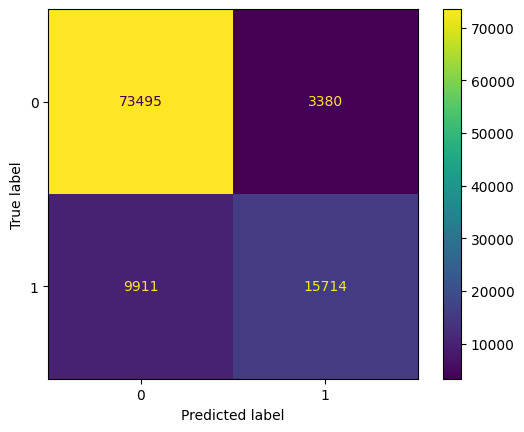

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay


_ = ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

In [ ]:
# top 5 features that increase
top = 5
coeffs = list(model.coef_[0, :])
orders = sorted(coeffs, reverse=True)

for i in range(top):
    position = coeffs.index(orders[i])
    print("Name of the feature:", X_train.columns[position], "Coefficient:", orders[i])


Name of the feature: formeJuridique_1_6589.0 Coefficient: 2.060337455919256
Name of the feature: formeJuridique_1_6598.0 Coefficient: 1.9448443535936306
Name of the feature: entrepriseAgricole Coefficient: 1.343069647755658
Name of the feature: formeJuridique_1_6599.0 Coefficient: 1.3055760695382532
Name of the feature: Anne_creation_fourchette_2020.0 Coefficient: 1.0914799338977106


In [ ]:
# top 5 features that decrease
top = 5
coeffs = list(model.coef_[0, :])
orders = sorted(coeffs, reverse=False)

for i in range(top):
    position = coeffs.index(orders[i])
    print("Name of the feature:", X_train.columns[position], "Coefficient:", orders[i])


Name of the feature: salarieEnFrance Coefficient: -2.5432986588075392
Name of the feature: formeJuridique_1_5699.0 Coefficient: -2.342480079048718
Name of the feature: Anne_creation_fourchette_2025.0 Coefficient: -2.228189617441272
Name of the feature: formeJuridique_1_5599.0 Coefficient: -2.166316518955166
Name of the feature: typePersonne_P Coefficient: -2.0409906092137176


In [ ]:
# ROC Curve